### 네이버 증권 kospi 일별 지수 크롤링
- 크롤링 후 데이터프레임으로 변환

In [1]:
import pandas as pd
import requests

In [2]:
url = 'https://m.stock.naver.com/api/index/KOSPI/price?pageSize=10&page=2'

In [3]:
response = requests.get(url)
response

<Response [200]>

In [4]:
response.text

'[{"localTradedAt":"2022-07-22","closePrice":"2,393.14","compareToPreviousClosePrice":"-16.02","compareToPreviousPrice":{"code":"5","text":"하락","name":"FALLING"},"fluctuationsRatio":"-0.66","openPrice":"2,405.37","highPrice":"2,417.91","lowPrice":"2,391.48"},{"localTradedAt":"2022-07-21","closePrice":"2,409.16","compareToPreviousClosePrice":"22.31","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"0.93","openPrice":"2,387.91","highPrice":"2,411.96","lowPrice":"2,387.91"},{"localTradedAt":"2022-07-20","closePrice":"2,386.85","compareToPreviousClosePrice":"15.88","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"0.67","openPrice":"2,406.29","highPrice":"2,410.06","lowPrice":"2,382.65"},{"localTradedAt":"2022-07-19","closePrice":"2,370.97","compareToPreviousClosePrice":"-4.28","compareToPreviousPrice":{"code":"5","text":"하락","name":"FALLING"},"fluctuationsRatio":"-0.18","openPrice":"2,367.52","highPrice":"2,372.74",

In [28]:
result = response.json()
result[:2]

[{'localTradedAt': '2022-07-22',
  'closePrice': '2,393.14',
  'compareToPreviousClosePrice': '-16.02',
  'compareToPreviousPrice': {'code': '5', 'text': '하락', 'name': 'FALLING'},
  'fluctuationsRatio': '-0.66',
  'openPrice': '2,405.37',
  'highPrice': '2,417.91',
  'lowPrice': '2,391.48'},
 {'localTradedAt': '2022-07-21',
  'closePrice': '2,409.16',
  'compareToPreviousClosePrice': '22.31',
  'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
  'fluctuationsRatio': '0.93',
  'openPrice': '2,387.91',
  'highPrice': '2,411.96',
  'lowPrice': '2,387.91'}]

In [7]:
len(result)

10

In [9]:
date = [element['localTradedAt'] for element in result]
date

['2022-07-22',
 '2022-07-21',
 '2022-07-20',
 '2022-07-19',
 '2022-07-18',
 '2022-07-15',
 '2022-07-14',
 '2022-07-13',
 '2022-07-12',
 '2022-07-11']

In [10]:
price = [element['closePrice'] for element in result]
price

['2,393.14',
 '2,409.16',
 '2,386.85',
 '2,370.97',
 '2,375.25',
 '2,330.98',
 '2,322.32',
 '2,328.61',
 '2,317.76',
 '2,340.27']

In [23]:
df['date'] = date

In [24]:
df['price'] = price

In [25]:
df

,0,date,price
0,2022-07-22,2022-07-22,"2,393.14"
1,2022-07-21,2022-07-21,"2,409.16"
2,2022-07-20,2022-07-20,"2,386.85"
3,2022-07-19,2022-07-19,"2,370.97"
4,2022-07-18,2022-07-18,"2,375.25"
5,2022-07-15,2022-07-15,"2,330.98"
6,2022-07-14,2022-07-14,"2,322.32"
7,2022-07-13,2022-07-13,"2,328.61"
8,2022-07-12,2022-07-12,"2,317.76"
9,2022-07-11,2022-07-11,"2,340.27"


In [26]:
df.drop(0, axis = 1, inplace = True)

In [27]:
df

,date,price
0,2022-07-22,"2,393.14"
1,2022-07-21,"2,409.16"
2,2022-07-20,"2,386.85"
3,2022-07-19,"2,370.97"
4,2022-07-18,"2,375.25"
5,2022-07-15,"2,330.98"
6,2022-07-14,"2,322.32"
7,2022-07-13,"2,328.61"
8,2022-07-12,"2,317.76"
9,2022-07-11,"2,340.27"


### 함수로 적용

In [38]:
def get_stockdata(index, name, pagesize, page):
    url = f'https://m.stock.naver.com/api/{index}/{name}/price?pageSize={pagesize}&page={page}'
    
    response = requests.get(url)
    result = response.json()
    date = [element['localTradedAt'] for element in result]
    price = [element['closePrice'] for element in result]
    
    data = {'date':date, 'price':price}
    
    return pd.DataFrame(data)

In [42]:
KOSPI = get_stockdata('index','KOSPI',60,1)
KOSPI.head()

,date,price
0,2022-08-05,"2,490.80"
1,2022-08-04,"2,473.11"
2,2022-08-03,"2,461.45"
3,2022-08-02,"2,439.62"
4,2022-08-01,"2,452.25"


In [43]:
SAMSUNG = get_stockdata('stock','005930',60,1)
SAMSUNG.head()

,date,price
0,2022-08-05,"61,500"
1,2022-08-04,"61,500"
2,2022-08-03,"61,300"
3,2022-08-02,"61,700"
4,2022-08-01,"61,300"


In [44]:
KAKAO = get_stockdata('stock','035720',60,1)

In [47]:
df.rename(columns = {'price' : 'KOSPI'}, inplace = True)

In [49]:
df['SAMSUNG'], df['KAKAO'] = SAMSUNG['price'] , KAKAO['price']

In [50]:
df

,date,KOSPI,SAMSUNG,KAKAO
0,2022-07-22,"2,393.14","61,500","81,200"
1,2022-07-21,"2,409.16","61,500","81,700"
2,2022-07-20,"2,386.85","61,300","76,000"
3,2022-07-19,"2,370.97","61,700","71,800"
4,2022-07-18,"2,375.25","61,300","74,000"
5,2022-07-15,"2,330.98","61,400","74,800"
6,2022-07-14,"2,322.32","61,900","72,400"
7,2022-07-13,"2,328.61","61,800","71,900"
8,2022-07-12,"2,317.76","61,700","72,400"
9,2022-07-11,"2,340.27","61,100","73,000"


### 다음 증권 데이터 크롤링

In [51]:
url = 'https://finance.daum.net/api/quote/A035720/days?perPage=10&page=2&pagination=true'

In [56]:
headers = {
    'user-agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 13_2_3 like Mac OS X) AppleWebKit/605.1.15 \
(KHTML, like Gecko) Version/13.0.3 Mobile/15E148 Safari/604.1',
    'referer': 'https://m.finance.daum.net/'
    
}

In [57]:
response = requests.get(url,headers=headers)
response

<Response [200]>

In [60]:
result = response.json()
result['data']

[{'symbolCode': 'A035720',
  'date': '2022-07-22 15:30:29',
  'tradePrice': 72100.0,
  'tradeTime': '15:30:29',
  'change': 'FALL',
  'changePrice': 1600.0,
  'changeRate': -0.0217096336,
  'prevClosingPrice': 73700.0,
  'exchangeCountry': 'KOREA',
  'openingPrice': 73500.0,
  'highPrice': 73600.0,
  'lowPrice': 71600.0,
  'accTradePrice': 115820353800,
  'accTradeVolume': 1601677,
  'periodTradePrice': 115820353800,
  'periodTradeVolume': 1601677,
  'listedSharesCount': None},
 {'symbolCode': 'A035720',
  'date': '2022-07-21 15:30:20',
  'tradePrice': 73700.0,
  'tradeTime': '15:30:20',
  'change': 'RISE',
  'changePrice': 300.0,
  'changeRate': 0.0040871935,
  'prevClosingPrice': 73400.0,
  'exchangeCountry': 'KOREA',
  'openingPrice': 73900.0,
  'highPrice': 75000.0,
  'lowPrice': 73500.0,
  'accTradePrice': 92179877000,
  'accTradeVolume': 1244024,
  'periodTradePrice': 92179877000,
  'periodTradeVolume': 1244024,
  'listedSharesCount': None},
 {'symbolCode': 'A035720',
  'date': '

In [61]:
date = [date['date'] for date in result['data']]
date

['2022-07-22 15:30:29',
 '2022-07-21 15:30:20',
 '2022-07-20 15:30:15',
 '2022-07-19 15:30:29',
 '2022-07-18 15:30:02',
 '2022-07-15 15:30:08',
 '2022-07-14 15:30:19',
 '2022-07-13 15:30:27',
 '2022-07-12 15:30:06',
 '2022-07-11 15:30:11']

In [63]:
tradeprice = [tradeprice['tradePrice'] for tradeprice in result['data']]
tradeprice

[72100.0,
 73700.0,
 73400.0,
 72800.0,
 72800.0,
 70100.0,
 72100.0,
 71900.0,
 70300.0,
 71300.0]

In [65]:
data = {
    'date' : date,
    'kakao' : tradeprice
}

df = pd.DataFrame(data)
df

,date,kakao
0,2022-07-22 15:30:29,72100.0
1,2022-07-21 15:30:20,73700.0
2,2022-07-20 15:30:15,73400.0
3,2022-07-19 15:30:29,72800.0
4,2022-07-18 15:30:02,72800.0
5,2022-07-15 15:30:08,70100.0
6,2022-07-14 15:30:19,72100.0
7,2022-07-13 15:30:27,71900.0
8,2022-07-12 15:30:06,70300.0
9,2022-07-11 15:30:11,71300.0


<AxesSubplot:>

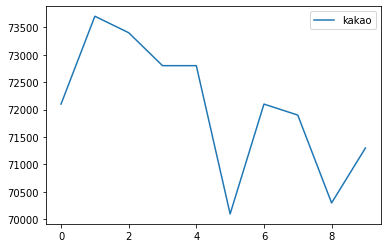

In [66]:
df.plot()